# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Determine which viarables are predictors of a customer that converts to a paying customer.

#### 2. What are the predictors/covariates? 

Answer: The predictors is Activity Score and the Last Log In Dayes.  Covariates are age, gender, location and professions.

#### 3. What timeframe is this data relevent for?

Answer: January 2015 through April 2015

#### 4. What is the hypothesis?

Answer: That people with activity score of 1 are more likely to convert.  That age, gender, location and profession are not accurate predictors of conversion.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
**Admit** | 0=not admitted 1=admitted | categorical
**GRE** | candidites GRE | continous
**GPA** | candidiates GPA | continous
**Prestige** | candidiates undergrad schools presige rank | ordinal categorical



We would like to explore if GRE, GPA and Presige of Undergradute School is a predictor of Admittance.

#### 2. What is the outcome?

Answer: Determine if the different variables are a predictor of admission into class.

#### 3. What are the predictors/covariates? 

Answer:The predictors is GPA and GRE of the candidate. Covariates are the rankings of the undergraduate school  the candidate attended.

#### 4. What timeframe is this data relevent for?

Answer: 1 year

#### 4. What is the hypothesis?

Answer: GPA and GRE will have high kertosis and very little range which will show that GPA and GRE are preditors for admission.  Higher level of Presige of Undergraduate School will have greater kertosis than Lower Level of Prestige and will show that Prestige Rank can be a predictor of admission.

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goal is to create a set of questions for identify the correct dataset for analysis in order to determine weither a variable is a predictor of admission to class.

#### 2a. What are the assumptions of the distribution of data? 

Answer: When creating a density plot of the variables for admissions, if the density plot has a normal distribution then we know the variable is a predictor variable.  The higher the 

#### 2b. How will determine the distribution of your data? 

Answer: Determine what if the variable is a predictor variable by density plotting the data for each variable admission frequency.  

#### 3a. How might outliers impact your analysis? 

Answer: Outliers could cause the data to have a mean and median that do not closely align and skew data.

#### 3b. How will you test for outliers? 

Answer:Plot the mean and median and if they are close we know there are few outliers impacting the distribution for the variable.

#### 4a. What is colinearity? 

Answer: Colinearity is the linear association between two predictor variables. 

#### 4b. How will you test for colinearity? 

Answer: In order to test colinearity, we will need to plot the gpa, gre, and the 4 prestege variables set to bineary admit, not admit.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 


Answer: Plot out GRE, GPA and Prestige. Look at the kurtosis of the gre and gpa variable to determine if the variables gre scores and gpa scores predictors of admission.  If high kurtosis, then we know that the variable does not have a high variance for score in relationship to admission.  We then look at Prestige and by plotting the binary value of admittance for level of Prestige we are able to determine if the Prestige level is a predictor for admission.  With each of these variables we will need to measure skewness along with variance between mean and median to determine if outliers are having impacting the plotting of the data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

path = "../assets/admissions.csv"

df = pd.read_csv(path)



In [22]:

df.head() # see what the data looks like, defaults to first 5 rows

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [23]:
 print df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64


In [24]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


In [25]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [26]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [99]:
df.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

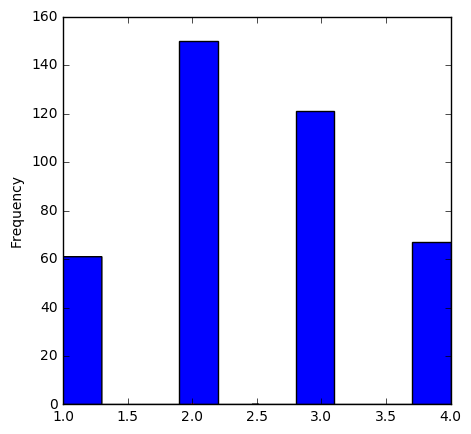

In [30]:
df.prestige.plot(kind="hist",
              figsize=(5,5),
              xlim=(1,4))


plt.vlines(df.prestige.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0)

plt.vlines(df.prestige.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red")

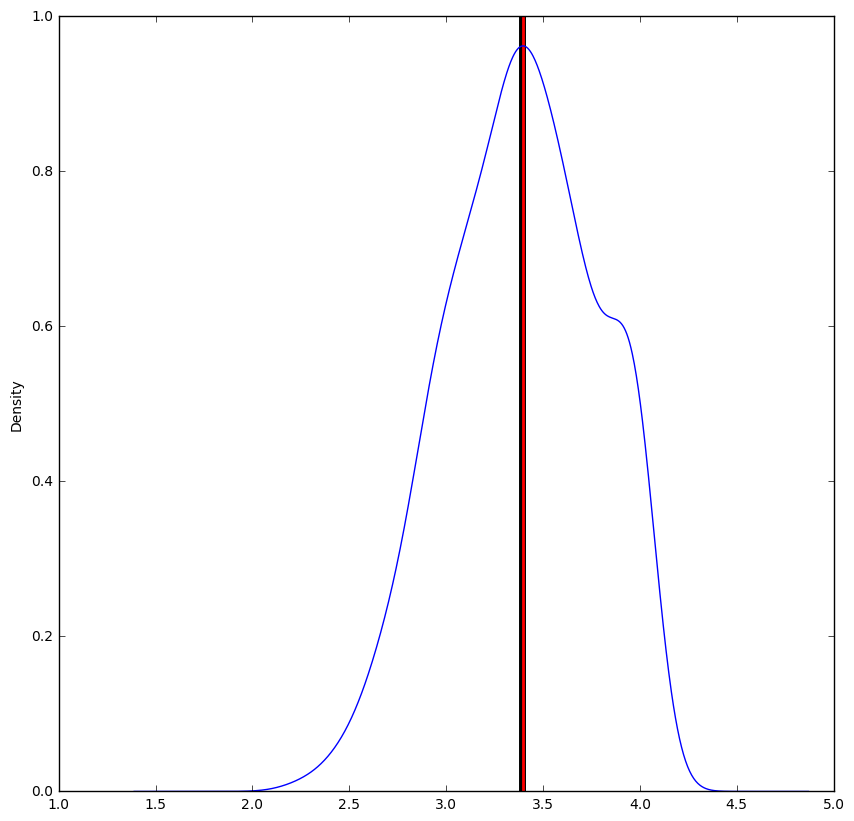

In [56]:
df.gpa.plot(kind="density",
              figsize=(10,10))

plt.vlines(df.gpa.mean(),     # Plot black line at mean 
           ymin=0, 
           ymax=1,
           linewidth=5.0)

plt.vlines(df.gpa.median(),   # Plot red line at median
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="red")

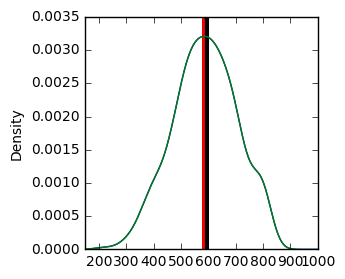

In [94]:
df.gre.plot(kind="density",
            figsize=(3,3),
            xlim=(150, 1000))

plt.vlines(df.gre.mean(),     # Plot black line at mean 
           ymin=0, 
           ymax=0.0035,
           linewidth=5.0)

plt.vlines(df.gre.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red")
df.gre.plot(kind="density",
            figsize=(3,3),
            xlim=(150, 1000))

plt.vlines(df.gre.mean(),     # Plot black line at mean 
           ymin=0, 
           ymax=0.0035,
           linewidth=5.0)

plt.vlines(df.gre.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red")

In [11]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [88]:
cols_to_keep = ['admit', 'gre', 'gpa']
prestige_only = dummy_ranks
complete_data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print complete_data.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


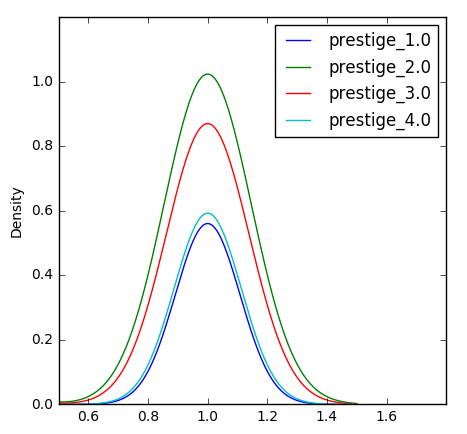

In [98]:
prestige_only.plot.kde(figsize=(5,5),
              xlim=(.5,1.8),
              ylim=(0, 1.2))



## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model